In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

In [20]:
def Gaussian(x, mu, sigma):
    return np.exp(-np.linalg.norm(x - mu)**2 / (2 * sigma**2))

In [21]:
# get the mean and var when class is 0
X0 = X[y == 0]
mu0 = np.mean(X0, axis=0)
sigma0 = np.std(X0, axis=0)

# get the mean and var when class is 1
X1 = X[y == 1]
mu1 = np.mean(X1, axis=0)
sigma1 = np.std(X1, axis=0)

print(f"The mean of class 0 is {mu0[0]} and the variance is {sigma0[0]**2}")
print(f"The mean of class 1 is {mu1[0]} and the variance is {sigma1[0]**2}")

The mean of class 0 is 8.764004000000002 and the variance is 2.169308563184
The mean of class 1 is 4.131046 and the variance is 3.6730895124839993


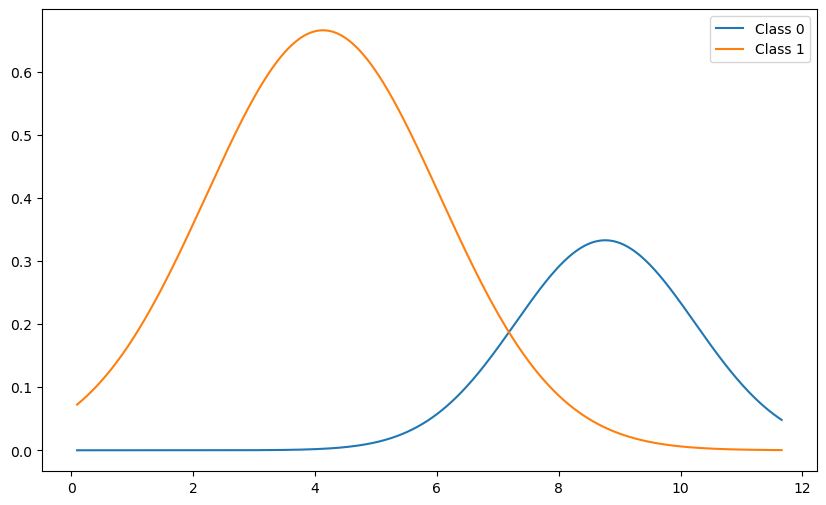

In [23]:
# Calculate the probability of each class
p0 = len(X0) / len(X)
p1 = len(X1) / len(X)

# Generate random x values to plot the pdfs
x = np.linspace(X.min(), X.max(), 1000)

# Calculate estimate pdfs for each class
pdf0 = np.array([Gaussian(x[i], mu0, sigma0) for i in range(len(x))])
pdf1 = np.array([Gaussian(x[i], mu1, sigma1) for i in range(len(x))])

# Scale the pdfs by the probability of each class
scaled_pdf0 = pdf0 * p0
scaled_pdf1 = pdf1 * p1



# Plot the scaled pdfs
plt.figure(figsize=(10, 6))
plt.plot(x, scaled_pdf0, label='Class 0')
plt.plot(x, scaled_pdf1, label='Class 1')
plt.legend()
plt.show()

In [24]:
x_new = 6.271

# Calculate the probability of each class given the new x value
p0_new = Gaussian(x_new, mu0, sigma0) * p0
p1_new = Gaussian(x_new, mu1, sigma1) * p1

print(f"The probability of class 0 given x_new is {p0_new}")
print(f"The probability of class 1 given x_new is {p1_new}")

# Using the bayes classifier to predict the class of the new x value
if p0_new > p1_new:
    print(f"The class of x_new is 0")
else:
    print(f"The class of x_new is 1")

The probability of class 0 given x_new is [0.07957047]
The probability of class 1 given x_new is [0.35742232]
The class of x_new is 1


In [25]:
from scipy.optimize import fsolve

def f(x):
    return Gaussian(x, mu0, sigma0) * p0 - Gaussian(x, mu1, sigma1) * p1

x_star = fsolve(f, 7)
print(f"The value of x_star is {x_star[0]} which is the decision boundary")

The value of x_star is 7.183860319176402 which is the decision boundary


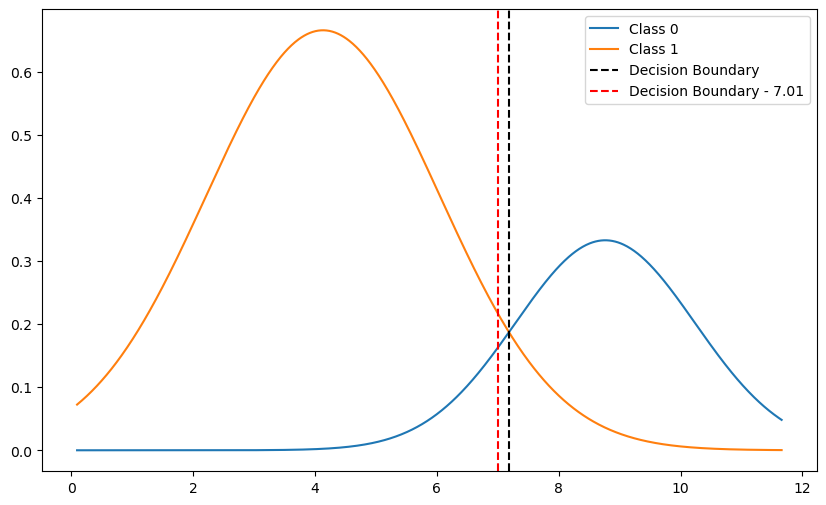

In [26]:
# Plot the scaled pdfs with the decision boundary
plt.figure(figsize=(10, 6))
plt.plot(x, scaled_pdf0, label='Class 0')
plt.plot(x, scaled_pdf1, label='Class 1')
plt.axvline(x_star, color='black', linestyle='--', label='Decision Boundary')
plt.axvline(7.01, color='red', linestyle='--', label='Decision Boundary - 7.01')
plt.legend()
plt.show()